In [3]:
# ## Enviroment Setup
# import os, sys
# WORKING_DIR = '/home/peizhi/Documents/gmesh'
# os.chdir(WORKING_DIR) # change the working directory to the project's absolute path
# print("Current Working Directory: ", os.getcwd())

## Computing Device
device = 'cuda:0'
import torch

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

import gmesh.utils.o3d_utils as o3d_utils
from gmesh.utils.mesh2gaussians_utils import mesh_to_gaussians
from gmesh.scenes.mesh import Mesh
from gmesh.scenes.cameras import PerspectiveCamera
from gmesh.renderer.renderer_pytorch3d import CustomMeshRenderer
from gmesh.renderer.shader import simple_phone_shading
from gmesh.utils.vis_utils import visualize_rgbd_alpha


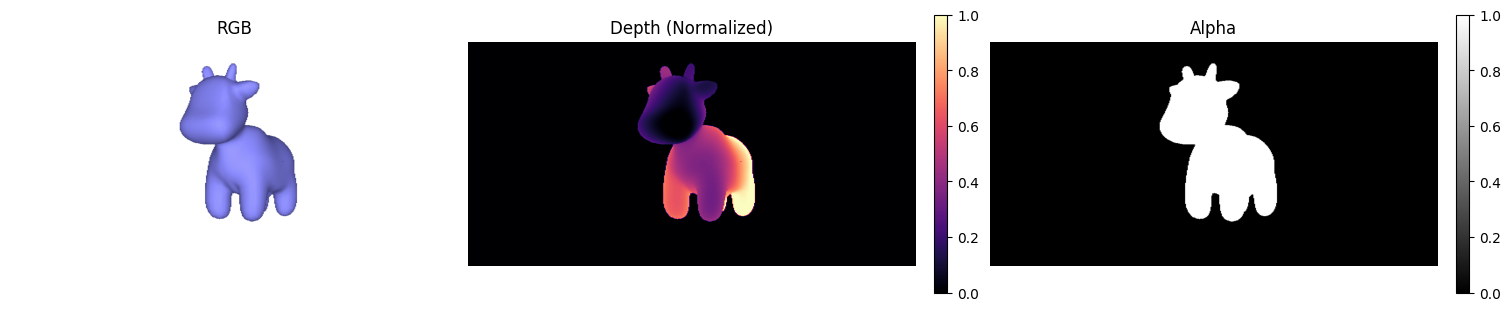

In [4]:

# load an example mesh
vertices, faces = o3d_utils._read_obj_file('../assets/data/spot.obj', uv=False)

# rotate the mesh along the y axis (yaw)
theta = np.pi * 0.8
rotation_matrix = torch.tensor([
    [np.cos(theta), 0, np.sin(theta)],
    [0, 1, 0],
    [-np.sin(theta), 0, np.cos(theta)]
], dtype=torch.float32, device=device)

# convert from numpy arrays to tensors
vertices = torch.from_numpy(vertices).float().to(device) @ rotation_matrix.T  # [V, 3]
faces = torch.from_numpy(faces).to(device) # [F, 3]

# shading for visualization: add vertex colors
colors = simple_phone_shading(vertices=vertices, faces=faces)

# create to Mesh object
mesh = Mesh(verts=vertices, faces=faces, colors=colors)

# create the camera
camera = PerspectiveCamera(
    image_width=1024, image_height=512, fov_x=40, fov_y=20, z_near=0.1, z_far=100, device=device
)

# create mesh renderer
mesh_renderer = CustomMeshRenderer(camera=camera)

# set camera pose (yaw, pitch, roll, dx, dy, dz)
camera_pose = torch.tensor([[0,0,0,0,0,7.0]]).float().to(device)

# render the 3D mesh
rgb, depth, alpha = mesh_renderer.render(mesh=mesh, camera_pose=camera_pose)


# visualize the rendering
visualize_rgbd_alpha(rgb, depth, alpha)

